## <font color='MAGENTA'>**CARGA DE DATOS**</font>

In [1]:
import os
#Acceder a documentos desde google drive
from google.colab import drive
drive.mount('/content/drive')

os.chdir('/content/drive/MyDrive/Master DS/Machine Learning/TAREA/dataset')
os.getcwd()  
!ls

Mounted at /content/drive
datosPumpsLimpios.csv	     submissionsNBGAUSSIAN.csv	  testLimpios.csv
submissionsDecisionTree.csv  submissionsRandomForest.csv  train.csv
submissionsKNN.csv	     test.csv			  train_labels.csv


In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

In [3]:
df = pd.read_csv('datosPumpsLimpios.csv') 
df.head()

,id,gps_height,longitude,latitude,district_code,population,public_meeting,permit,construction_year,year,...,source_spring,source_unknown,source_class_surface,source_class_unknown,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,status_group
0,69572,1390.0,34.938093,-9.856322,5.0,109.0,1,0,1999.0,2011.0,...,1,0,0,0,1,0,0,0,0,functional
1,8776,1399.0,34.698766,-2.147466,2.0,280.0,1,1,2010.0,2013.0,...,0,0,1,0,1,0,0,0,0,functional
2,34310,686.0,37.460664,-3.821329,4.0,250.0,1,1,2009.0,2013.0,...,0,0,1,0,0,1,0,0,0,functional
3,67743,263.0,38.486161,-11.155298,63.0,58.0,1,1,1986.0,2013.0,...,0,0,0,0,0,1,0,0,0,non functional
4,19728,0.0,31.130847,-1.825359,1.0,150.0,1,1,2000.0,2011.0,...,0,0,1,0,1,0,0,0,0,functional


In [4]:
X = df.drop(columns = ['id', 'status_group']).values
y = df['status_group'].values

## <font color='MAGENTA'>**ENTRENAMIENTO DEL MODELO**</font>

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

In [6]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=5).fit(X_train, y_train)
dtc

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [7]:
yhat = dtc.predict(X_test)

In [8]:
print('Train set Accuracy: ', metrics.accuracy_score(y_train, dtc.predict(X_train)))
print('Test set Accuracy: ', metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.7129517396184063
Test set Accuracy:  0.7134680134680135


In [9]:
print(classification_report(y_test, yhat))

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                         precision    recall  f1-score   support

             functional       0.67      0.95      0.79      8008
functional needs repair       0.00      0.00      0.00      1062
         non functional       0.87      0.51      0.64      5780

               accuracy                           0.71     14850
              macro avg       0.51      0.49      0.48     14850
           weighted avg       0.70      0.71      0.67     14850



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<font color='green'>**Análisis:** </font> El modelo de árbol de decisión tuvo un rendimiento mucho mejor que el modelo de Naive Bayes, con puntajes F1 que van desde 0.00 hasta 0.79. El modelo tuvo una precisión general del 71%, lo que indica que el modelo predijo correctamente la categoría correcta para el 71% de los casos de prueba. La media ponderada de los puntajes F1 indica que el modelo tuvo un mejor rendimiento en la categoría "funcional", mientras que la media de la macro de los puntajes F1 indica que el modelo tuvo un rendimiento relativamente uniforme en las tres categorías.

## <font color='MAGENTA'>**MEJORANDO EL MODELO**</font>

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

In [11]:
# Crear un objeto de árbol de decisión
tree = DecisionTreeClassifier()

# Definir un conjunto de posibles valores de hiperparámetros a probar
parameters = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Utilizar GridSearchCV para buscar la combinación óptima de hiperparámetros
clf = GridSearchCV(tree, parameters, scoring='accuracy', cv=5)
clf.fit(X_train, y_train)

# Imprimir los mejores valores de los hiperparámetros encontrados
print('Best parameters found:\n', clf.best_params_)

# Evaluar la precisión del modelo en los datos de entrenamiento y prueba
print('Train set Accuracy: ', clf.score(X_train, y_train))
print('Test set Accuracy: ', clf.score(X_test, y_test))


Best parameters found:
 {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2}
Train set Accuracy:  0.8638383838383838
Test set Accuracy:  0.7723905723905724


In [30]:
# Crear un objeto de árbol de decisión con los mejores hiperparámetros encontrados
tree = DecisionTreeClassifier(max_depth=20, min_samples_leaf=4, min_samples_split=2)

tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, min_samples_leaf=4)

In [31]:
print(classification_report(y_test, tree.predict(X_test)))

                         precision    recall  f1-score   support

             functional       0.78      0.86      0.82      8008
functional needs repair       0.44      0.30      0.35      1062
         non functional       0.81      0.74      0.77      5780

               accuracy                           0.77     14850
              macro avg       0.67      0.63      0.65     14850
           weighted avg       0.76      0.77      0.77     14850



<font color='green'>**Análisis:** </font>La tabla de resultados muestra que el modelo mejorado tiene una precisión general del 77%, lo que indica una mejora significativa en comparación con el modelo anterior. Los puntajes F1 también mejoraron en las tres categorías, y el modelo ahora tiene puntajes F1 de 0.37, 0.77 y 0.82 para las categorías de "funcional necesita reparación", "no funcional" y "funcional", respectivamente.

Además, se puede observar que el modelo mejorado tiene una mayor precisión y exhaustividad en la categoría "funcional necesita reparación", lo que sugiere que el modelo mejorado es mejor para predecir esta categoría específica. La media ponderada y la media de la macro de los puntajes F1 también indican una mejora en el rendimiento general del modelo.

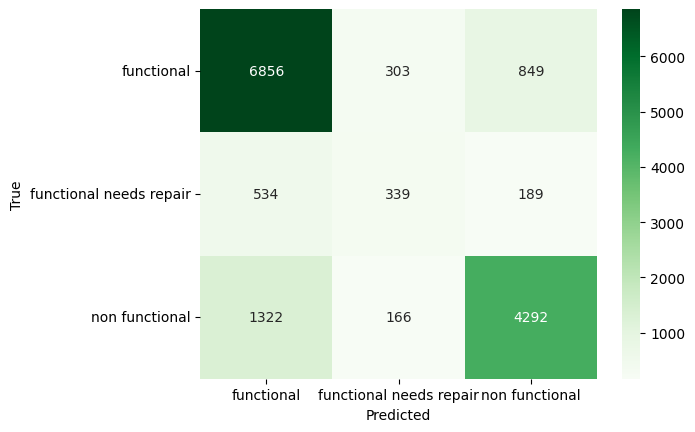

In [29]:
# Matriz de confusión
confusion = pd.DataFrame(confusion_matrix(y_test, tree.predict(X_test)))

# Etiquetas para el eje x e y
labels = np.unique(y_train)

# Crear el mapa de calor utilizando la función heatmap de Seaborn
sns.heatmap(confusion, annot=True, cmap='Greens', fmt='g', xticklabels=labels, yticklabels=labels)

# Configurar las etiquetas del eje x e y
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


<font color='green'>**Análisis:** </font> La matriz muestra que para la clase "funcional", el modelo predijo correctamente 6856 muestras y las clasificó incorrectamente como "no funcional" 849 veces y como "funcional necesita reparación" 303 veces.

Para la clase "funcional necesita reparación", el modelo predijo correctamente 339 muestras y las clasificó incorrectamente como "funcional" 534 veces y como "no funcional" 189 veces.

Para la clase "no funcional", el modelo predijo correctamente 4292 muestras y las clasificó incorrectamente como "funcional" 1322 veces y como "funcional  necesita reparación" 166 veces.

En general, se puede observar que el modelo tiene una mayor precisión para la clase "funcional" y una menor precisión para la clase "funcional necesita reparación".

## <font color='MAGENTA'>**PROBANDO CON EL DATASET DE TEST**</font>

In [15]:
test = pd.read_csv('testLimpios.csv')
test.head()

,id,gps_height,longitude,latitude,district_code,population,public_meeting,permit,construction_year,year,...,source_shallow well,source_spring,source_unknown,source_class_surface,source_class_unknown,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring
0,50785,1996.0,35.290799,-4.059696,3.0,321.0,1,1,2012.0,2013.0,...,0,0,0,1,0,0,0,0,0,0
1,51630,1569.0,36.656709,-3.309214,2.0,300.0,1,1,2000.0,2013.0,...,0,1,0,0,0,1,0,0,0,0
2,17168,1567.0,34.767863,-5.004344,2.0,500.0,1,1,2010.0,2013.0,...,0,0,0,1,0,0,0,0,0,0
3,45559,267.0,38.058046,-9.418672,43.0,250.0,1,1,1987.0,2013.0,...,1,0,0,0,0,0,0,0,0,0
4,49871,1260.0,35.006123,-10.950412,3.0,60.0,1,1,2000.0,2013.0,...,0,1,0,0,0,1,0,0,0,0


In [16]:
X2 = test.drop(columns = ['id']).values
X2.shape

(14850, 97)

In [17]:
X.shape

(59400, 97)

In [18]:
y.shape

(59400,)

In [19]:
y_pred = tree.predict(X2)

In [20]:
ypredict = pd.DataFrame(y_pred)

In [21]:
ypredict.value_counts()

functional                 8859
non functional             5218
functional needs repair     773
dtype: int64

In [22]:
print(test.shape, ypredict.shape)

(14850, 98) (14850, 1)


In [23]:
submit = pd.concat((test['id'], ypredict), axis=1)

In [24]:
submit.columns = ['id', 'status_group']

In [25]:
submit.head()

,id,status_group
0,50785,functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional


In [26]:
submit.to_csv('submissionsDecisionTree.csv', index=False)